# Código para obtención de Diagrama Voronoi de mapa urbano
### Jesus Daniel Caballero Colina
### Inteligencia Artificial y Minirobots

In [2]:
%matplotlib inline
from IPython.display import Markdown as md
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
import copy
from scipy.spatial import Voronoi, voronoi_plot_2d

## Funciones auxiliares para el preprocesamiento del mapa

In [3]:
def apertura(img,a):
    img1 = copy.copy(img)
    B = cv2.getStructuringElement(cv2.MORPH_RECT,(a,a))
    
    temp = cv2.erode(img1,B)
    aper = cv2.dilate(temp,B)
    
    return aper

def cierre(img,a):
    img1 = copy.copy(img)
    B = cv2.getStructuringElement(cv2.MORPH_RECT,(a,a))
    
    temp = cv2.dilate(img1,B)
    aper = cv2.erode(temp,B)
    
    return aper

def filtro(img,a):
    img1 = copy.copy(img)
    
    temp = apertura(img1,a)
    filtro = cierre(temp,a)
    
    return filtro

def hit_or_miss(img,B1,B2):
    img1 = copy.copy(img)
    temp1 = cv2.erode(img1,B1)
    temp2 = cv2.erode(img1,B2)
    out = cv2.bitwise_and(temp1,temp2)
    
    return out

def adelgazar(img,inf,sup):
    img1 = copy.copy(img)
    size = np.size(img1)    
    ret,ther = cv2.threshold(img1,inf,sup,0)
    ther = filtro(ther,3)
    adel = ther
    adel_ant = adel
    
    B1 = np.empty((8,3,3),np.uint8)
    B1[0] = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])
    B1[1] = np.array([[0, 0, 0], [1, 1, 0], [1, 1, 0]])
    B1[2] = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]])
    B1[3] = np.array([[1, 1, 0], [1, 1, 0], [0, 0, 0]])
    B1[4] = np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]])
    B1[5] = np.array([[0, 1, 1], [0, 1, 1], [0, 0, 0]])
    B1[6] = np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]])
    B1[7] = np.array([[0, 0, 0], [0, 1, 1], [0, 1, 1]])
    B2 = np.empty((8,3,3),np.uint8)
    B2[0] = np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]])
    B2[1] = np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]])
    B2[2] = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])
    B2[3] = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 1]])
    B2[4] = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]])
    B2[5] = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0]])
    B2[6] = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0]])
    B2[7] = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 0]])
    
    done = False
    while( not done):
        for i in range(len(B1)):
            temp = hit_or_miss(adel,B1[i][:][:],B2[i][:][:])
            adel = adel - temp # A-A*B = AxB
            
        if not np.any(adel - adel_ant):
            done = True
        
        adel_ant = adel
    
    ret,ther = cv2.threshold(img1,inf,sup,0)
    ther = filtro(ther,3)
    return ther,adel

## Proceso de preprocesamiento de mapa

In [4]:
img1 = cv2.imread('Mapa.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ther1,thinned1 = adelgazar(img1,250,255)

#cv2.imwrite('Mapa_ther.png', ther1)
print(img1)

[[223 223 223 ... 251 238 227]
 [223 223 223 ... 255 255 255]
 [223 223 223 ... 255 255 255]
 ...
 [248 248 243 ... 248 248 248]
 [248 242 222 ... 248 248 248]
 [241 221 226 ... 248 248 248]]


## Generador de puntos Voronoi - Forma Manual

Forma muy engorrosa (casi 2 horas) pero se puede sacar la totalidad de los puntos, sin embargo pueden no estar en el centro exacto de cada manzana

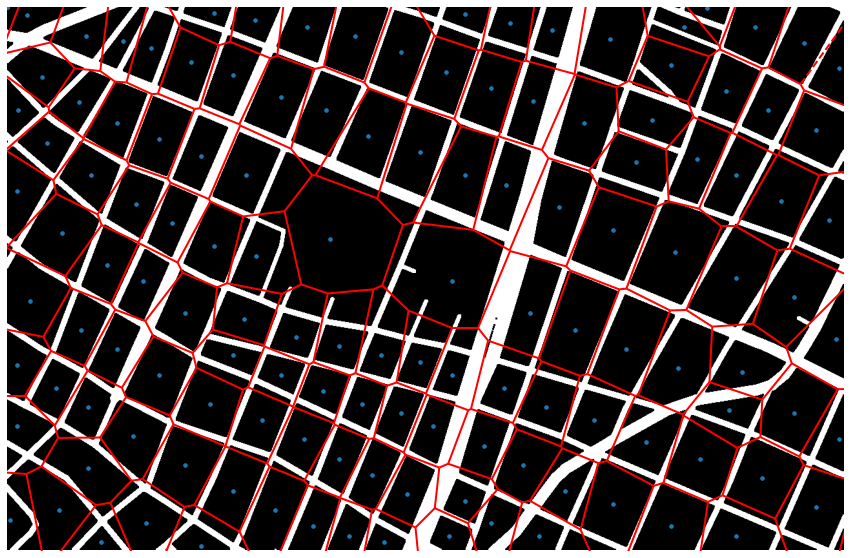

In [4]:
puntos = []
puntos.append([31,12])
puntos.append([122,45])
puntos.append([179,52])
puntos.append([223,64])
puntos.append([320,9])
puntos.append([17,159])
puntos.append([54,109])
puntos.append([111,147])
puntos.append([62,210])
puntos.append([0,0])
puntos.append([0,0])
puntos.append([0,0])
puntos.append([0,0])
puntos.append([0,0])
puntos.append([0,0])
puntos.append([0,0])
puntos.append([1085,1])
puntos.append([1290,95])
puntos.append([1235,55])
puntos.append([1160,30])
puntos.append([1050,30])
puntos.append([1030,90])
puntos.append([1000,175])
puntos.append([975,240])
puntos.append([1180,160])
puntos.append([1115,130])
puntos.append([1070,235])
puntos.append([1130,260])
puntos.append([1255,190])
puntos.append([1200,300])
puntos.append([1275,330])
puntos.append([1285,515])
puntos.append([1290,670])
puntos.append([1220,630])
puntos.append([1255,775])
puntos.append([1170,730])
puntos.append([1130,820])
puntos.append([1140,565])
puntos.append([750,800])
puntos.append([1220,450])
puntos.append([1130,420])
puntos.append([1040,560])
puntos.append([1120,625])
puntos.append([1075,700])
puntos.append([990,675])
puntos.append([1030,805])
puntos.append([940,770])
puntos.append([1035,380])
puntos.append([960,530])
puntos.append([940,345])
puntos.append([960,930])
puntos.append([880,500])
puntos.append([910,640])
puntos.append([835,620])
puntos.append([865,750])
puntos.append([800,710])
puntos.append([825,820])
puntos.append([1355,800])
puntos.append([685,820])
puntos.append([710,765])
puntos.append([740,680])
puntos.append([770,590])
puntos.append([810,475])
puntos.append([855,310])
puntos.append([895,180])
puntos.append([935,50])
puntos.append([5,795])
puntos.append([80,780])
puntos.append([145,830])
puntos.append([300,835])
puntos.append([215,800])
puntos.append([126,715])
puntos.append([15,650])
puntos.append([585,830])
puntos.append([530,820])
puntos.append([475,805])
puntos.append([415,780])
puntos.append([350,750])
puntos.append([275,710])
puntos.append([195,665])
puntos.append([845,35])
puntos.append([780,25])
puntos.append([710,10])
puntos.append([125,620])
puntos.append([15,285])
puntos.append([15,555])
puntos.append([35,455])
puntos.append([85,350])
puntos.append([130,260])
puntos.append([170,180])
puntos.append([75,590])
puntos.append([115,500])
puntos.append([155,400])
puntos.append([200,305])
puntos.append([235,205])
puntos.append([285,85])
puntos.append([610,70])
puntos.append([815,145])
puntos.append([750,125])
puntos.append([680,100])
puntos.append([540,45])
puntos.append([465,30])
puntos.append([385,20])
puntos.append([350,105])
puntos.append([300,230])
puntos.append([255,335])
puntos.append([210,425])
puntos.append([170,530])
puntos.append([235,570])
puntos.append([315,615])
puntos.append([395,640])
puntos.append([460,670])
puntos.append([515,700])
puntos.append([565,725])
puntos.append([620,755])
puntos.append([660,650])
puntos.append([610,630])
puntos.append([550,615])
puntos.append([490,595])
puntos.append([425,570])
puntos.append([350,540])
puntos.append([275,475])
puntos.append([320,370])
puntos.append([370,260])
puntos.append([425,140])
puntos.append([495,160])
puntos.append([560,200])
puntos.append([640,225])
puntos.append([710,260])
puntos.append([774,276])
puntos.append([690,570])
puntos.append([640,550])
puntos.append([580,540])
puntos.append([515,526])
puntos.append([448,512])
puntos.append([367,484])
puntos.append([386,386])
puntos.append([690,425])
puntos.append([500,360])

vor = Voronoi(puntos)

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.imshow(ther1, cmap=plt.cm.gray)
voronoi_plot_2d(vor,point_size=7, ax=ax, show_vertices=False, line_colors='red', line_alpha=1, line_width=2)
ax.set_xlim(0, 1297)
ax.set_ylim(0, 843)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()
fig1.savefig('Voronoi_Manual.png', bbox_inches="tight")

## Generador de puntos Voronoi - Forma Semi-Automática

Forma mas cómoda se obtener los puntos en el centro exacto de cada manzana, pero no se obtiene la totalidad de los puntos.

653,421
745,523
754,497
758,484


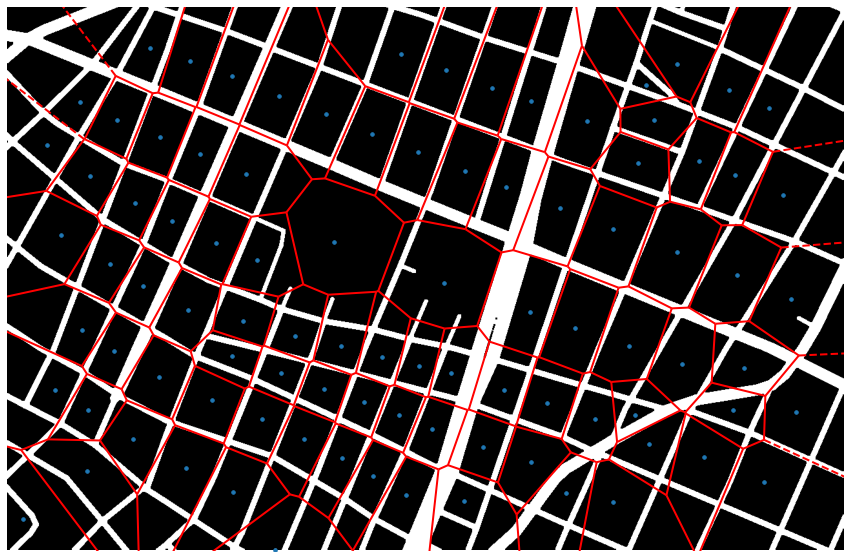

In [5]:
contours,_ = cv2.findContours(ther1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img2 = thinned1.copy()
cv2.drawContours(img2, contours, -1, (255, 255, 255), 2)
img3 = img2.copy()

puntos = []
for i in contours:
    momentos = cv2.moments(i)
    try:
        cx = int(momentos['m10']/momentos['m00'])
        cy = int(momentos['m01']/momentos['m00'])
        if (cx>738 and cx<762 and cy>480 and cy<545) or (cx>649 and cx<655 and cy>416 and cy<422):
            print(str(cx) + ',' + str(cy))
        else:
            cv2.circle(img3,(cx, cy), 3, (255,255,255), 3)
            puntos.append([cx,cy])
    except:
        print("An exception occurred")
    
vor = Voronoi(puntos)

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.imshow(ther1, cmap=plt.cm.gray)
voronoi_plot_2d(vor,point_size=7, ax=ax, show_vertices=False, line_colors='red', line_alpha=1, line_width=2)
ax.set_xlim(0, 1297)
ax.set_ylim(0, 843)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()
fig1.savefig('Voronoi_Auto.png', bbox_inches="tight")

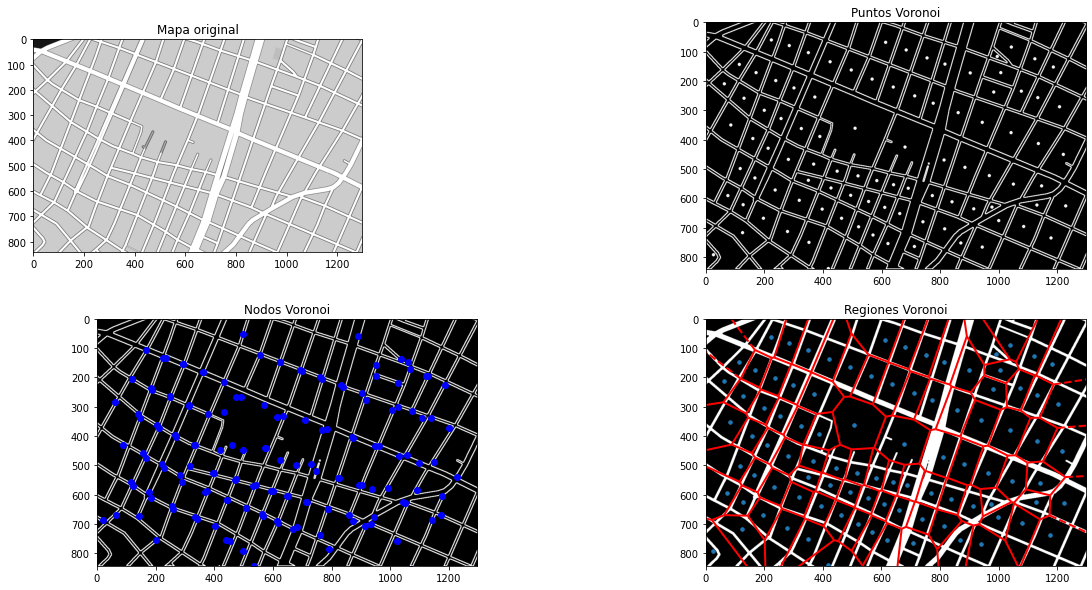

In [6]:
fig = plt.figure(figsize=(20,10))

plt.subplot(231), plt.imshow(img1, cmap=plt.cm.gray), plt.title('Mapa original')

plt.subplot(222), plt.imshow(img3, cmap=plt.cm.gray), plt.title('Puntos Voronoi')

plt.subplot(223), plt.imshow(img2, cmap=plt.cm.gray)
for vertice in vor.vertices:
    plt.plot(vertice[0],vertice[1], marker="o", color="blue"),
plt.imshow(img2, cmap=plt.cm.gray), plt.title('Nodos Voronoi')

ax = fig.add_subplot(224)
ax.imshow(ther1, cmap=plt.cm.gray)
voronoi_plot_2d(vor,point_size=7, ax=ax, show_vertices=False, line_colors='red', line_alpha=1, line_width=2)
ax.set_xlim(0, 1297)
ax.set_ylim(0, 843)
plt.gca().invert_yaxis()
plt.title('Regiones Voronoi')

plt.show()